ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SPY']: YFInvalidPeriodError("%ticker%: Period '2mo' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']")


CSV data saved to SPY_Daily_Returns.csv
Visual report saved to SPY_Daily_Returns.pdf


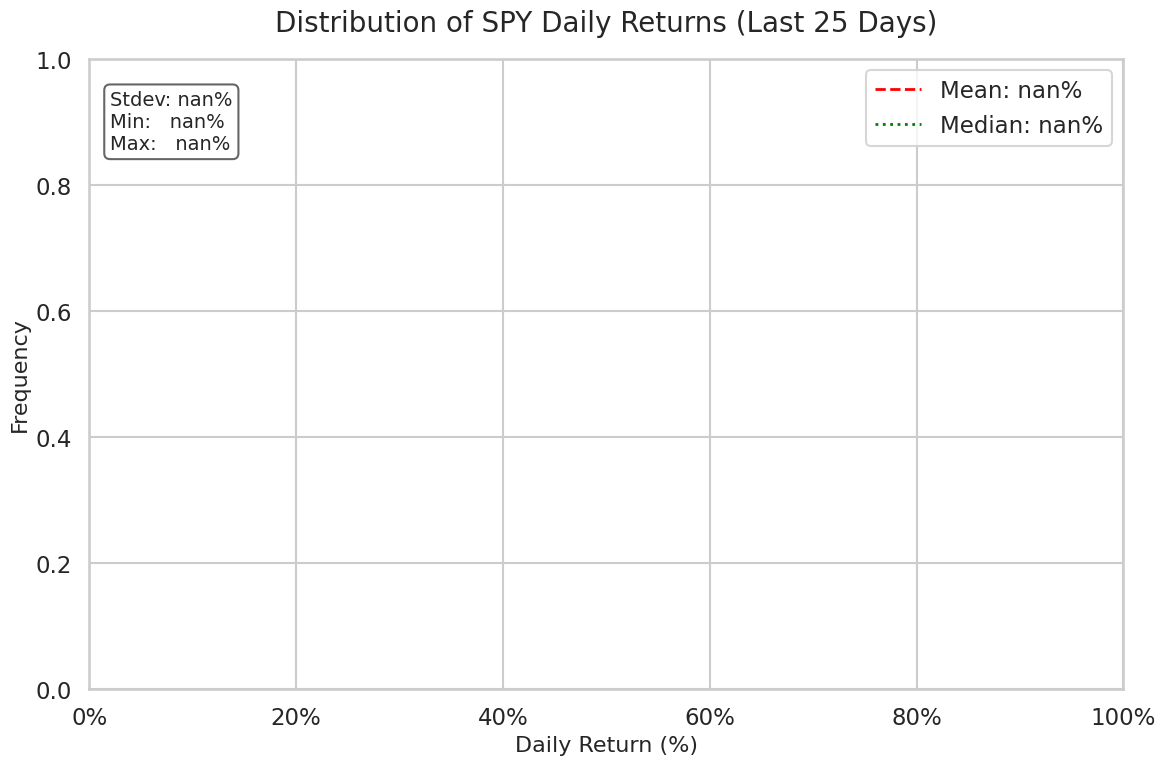

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

def fetch_spy_data(days=25):
    """
    Fetch SPY data for at least the last `days` trading days.
    We'll pull ~2 months of data and then take the last `days` rows.
    """
    # Download ~2 months of data; interval of 1 day
    df = yf.download('SPY', period='2mo', interval='1d', progress=False)

    # Sort just to be certain
    df.sort_index(inplace=True)

    # Slice the last `days` rows
    return df.tail(days)

def compute_daily_returns(df):
    """
    Given a DataFrame with a 'Close' column,
    compute the daily percentage returns.
    """
    df['Daily_Return'] = df['Close'].pct_change()
    return df

def plot_return_distribution(df, title='Distribution of SPY Daily Returns (Last 25 Days)'):
    """
    Plot a histogram of daily returns with vertical lines
    for mean and median, plus a KDE overlay.
    The plot is saved as a PDF.
    """
    # Drop NaN values from the Daily_Return column
    returns = df['Daily_Return'].dropna()

    mean_return = returns.mean()
    median_return = returns.median()
    std_return = returns.std()
    min_return = returns.min()
    max_return = returns.max()

    # Set Seaborn style and context for a cleaner, larger plot
    sns.set_style('whitegrid')
    sns.set_context('talk')  # Larger labels and titles

    # Create a figure
    plt.figure(figsize=(12, 8))

    # Plot histogram with KDE
    ax = sns.histplot(
        returns,
        bins=15,       # Adjust as needed
        kde=True,
        color='royalblue',
        edgecolor='black'
    )

    # Format the x-axis as percentages
    ax.xaxis.set_major_formatter(PercentFormatter(1.0))

    # Add vertical lines for mean and median
    plt.axvline(
        mean_return,
        color='red',
        linestyle='--',
        linewidth=2,
        label=f'Mean: {mean_return*100:.2f}%'
    )
    plt.axvline(
        median_return,
        color='green',
        linestyle=':',
        linewidth=2,
        label=f'Median: {median_return*100:.2f}%'
    )

    # Title and axis labels
    plt.title(title, fontsize=20, pad=20)
    plt.xlabel('Daily Return (%)', fontsize=16)
    plt.ylabel('Frequency', fontsize=16)

    # Place a legend in the upper right (or elsewhere as you prefer)
    plt.legend(loc='upper right')

    # Additional statistics in a text box
    text_str = (
        f'Stdev: {std_return*100:.2f}%\n'
        f'Min:   {min_return*100:.2f}%\n'
        f'Max:   {max_return*100:.2f}%'
    )
    plt.text(
        0.02, 0.95,
        text_str,
        transform=plt.gca().transAxes,
        fontsize=14,
        verticalalignment='top',
        bbox=dict(boxstyle="round", fc="white", ec="black", alpha=0.6)
    )

    plt.tight_layout()

    # Save the figure as a PDF
    pdf_filename = "SPY_Daily_Returns.pdf"
    plt.savefig(pdf_filename, format="pdf")
    print(f"Visual report saved to {pdf_filename}")

    plt.show()

def main():
    # 1. Fetch SPY data for the last 25 trading days
    spy_df = fetch_spy_data(days=25)

    # 2. Compute daily returns
    spy_df = compute_daily_returns(spy_df)

    # 3. Save the raw returns data as a CSV file
    csv_filename = "SPY_Daily_Returns.csv"
    spy_df.to_csv(csv_filename)
    print(f"CSV data saved to {csv_filename}")

    # 4. Create the improved distribution plot and save as PDF
    plot_return_distribution(spy_df)

if __name__ == "__main__":
    main()


CSV data saved to SPY_Daily_Returns.csv
Visual report saved to SPY_Daily_Returns.pdf


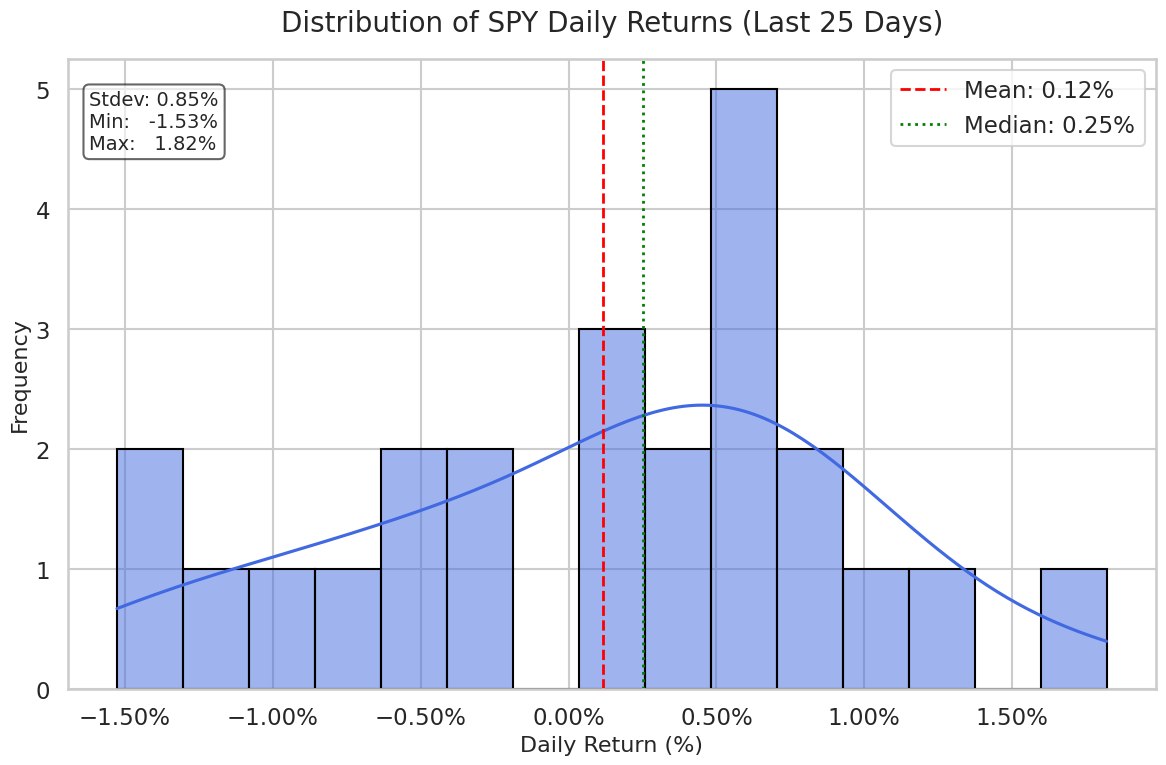

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import datetime

def fetch_spy_data(days=25):
    """
    Fetch SPY data for at least the last `days` trading days.
    We compute start_date and end_date explicitly using a 40-day window
    to ensure sufficient trading days.
    """
    end_date = datetime.date.today()
    start_date = end_date - datetime.timedelta(days=40)
    # Format dates as strings in YYYY-MM-DD format
    end_date_str = end_date.strftime("%Y-%m-%d")
    start_date_str = start_date.strftime("%Y-%m-%d")

    df = yf.download('SPY', start=start_date_str, end=end_date_str, interval='1d', progress=False)
    df.sort_index(inplace=True)

    # Return only the last `days` rows
    return df.tail(days)

def compute_daily_returns(df):
    """
    Given a DataFrame with price data, compute the daily percentage returns.
    Uses 'Adj Close' if available; otherwise, uses 'Close'.
    """
    price_col = 'Adj Close' if 'Adj Close' in df.columns else 'Close'
    df['Daily_Return'] = df[price_col].pct_change()
    return df

def plot_return_distribution(df, title='Distribution of SPY Daily Returns (Last 25 Days)'):
    """
    Plot a histogram of daily returns with KDE, and add vertical lines for the mean and median.
    The x-axis is formatted as percentages. The plot is saved as a PDF.
    """
    # Drop NaN values from the Daily_Return column
    returns = df['Daily_Return'].dropna()
    if returns.empty:
        print("No returns to plot!")
        return

    mean_return = returns.mean()
    median_return = returns.median()
    std_return = returns.std()
    min_return = returns.min()
    max_return = returns.max()

    # Set Seaborn style and context for a cleaner, larger plot
    sns.set_style('whitegrid')
    sns.set_context('talk')

    # Create a figure
    plt.figure(figsize=(12, 8))

    # Plot histogram with KDE overlay
    ax = sns.histplot(returns, bins=15, kde=True, color='royalblue', edgecolor='black')

    # Format the x-axis as percentages
    ax.xaxis.set_major_formatter(PercentFormatter(1.0))

    # Add vertical lines for mean and median
    plt.axvline(mean_return, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_return*100:.2f}%')
    plt.axvline(median_return, color='green', linestyle=':', linewidth=2, label=f'Median: {median_return*100:.2f}%')

    # Title and axis labels
    plt.title(title, fontsize=20, pad=20)
    plt.xlabel('Daily Return (%)', fontsize=16)
    plt.ylabel('Frequency', fontsize=16)

    # Place legend and additional statistics in a text box
    plt.legend(loc='upper right')
    text_str = (
        f'Stdev: {std_return*100:.2f}%\n'
        f'Min:   {min_return*100:.2f}%\n'
        f'Max:   {max_return*100:.2f}%'
    )
    plt.text(0.02, 0.95, text_str, transform=plt.gca().transAxes,
             fontsize=14, verticalalignment='top',
             bbox=dict(boxstyle="round", fc="white", ec="black", alpha=0.6))

    plt.tight_layout()

    # Save the plot as a PDF file
    pdf_filename = "SPY_Daily_Returns.pdf"
    plt.savefig(pdf_filename, format="pdf")
    print(f"Visual report saved to {pdf_filename}")

    plt.show()

def main():
    # 1. Fetch SPY data for the last 25 trading days
    spy_df = fetch_spy_data(days=25)
    if spy_df.empty:
        print("No data retrieved from yfinance!")
        return

    # 2. Compute daily returns using adjusted close prices if available
    spy_df = compute_daily_returns(spy_df)

    # 3. Save the data (including the Daily_Return column) as a CSV file
    csv_filename = "SPY_Daily_Returns.csv"
    spy_df.to_csv(csv_filename)
    print(f"CSV data saved to {csv_filename}")

    # 4. Plot the return distribution and save the plot as a PDF
    plot_return_distribution(spy_df)

if __name__ == "__main__":
    main()
